# Task 1: Data Collection and Preparation

In [1]:
import pandas as pd
import ast
import numpy as np

In [3]:
Charging_set = pd.read_csv('charging_sessions_preprocessed.csv', parse_dates=['connectionTime', 'disconnectTime', 'doneChargingTime'])

## This section will provide an overview of utilization and occupation for each site. This is to validate the calculation of the KPIs later on. 

#### Each site facilitates more than 50 stations. In this section we calculate the start point where each station has its first charging session to derive the start of use for each station, as it might be unlikely, that each station on either site got installed at the same timestamp and used until the last timestamp is recorded in the dataset. We assume that the installation of a station is at the same timestamp as the first charging session of that respective station starts and the end of the disconnectTime of the last chargingsession of that station is the time of deinstallation.

In [ ]:
## calculate the total potential time each station could be utilized by subtracting the minimal timestamp from the maximum timestamp of each station.

# Convert 'time' to datetime
Charging_set['connectionTime'] = pd.to_datetime(Charging_set['connectionTime'])
Charging_set['disconnectTime'] = pd.to_datetime(Charging_set['disconnectTime'])

# Extract the minimum and maximum timestamps
Charging_set['min_timestamp_per_station'] = Charging_set.groupby('stationID')['connectionTime'].transform('min')
Charging_set['max_timestamp_per_station'] = Charging_set.groupby('stationID')['disconnectTime'].transform('max')

#calculate total potential time each station could be used
Charging_set['total_time_potential_usage_per_station'] = (Charging_set['max_timestamp_per_station'] - Charging_set['min_timestamp_per_station']).dt.total_seconds()

# Drop intermediate columns
Charging_set = Charging_set.drop(['min_timestamp_per_station', 'max_timestamp_per_station'], axis=1)

print(Charging_set[['stationID', 'total_time_potential_usage_per_station']].drop_duplicates())

total_time_df = Charging_set[['stationID', 'total_time_potential_usage_per_station']].drop_duplicates()


          stationID  total_time_potential_usage_per_station
0       1-1-179-810                              92565327.0
1       1-1-193-825                              92550788.0
2       1-1-193-829                              92530448.0
3       1-1-193-820                              92557907.0
4       1-1-193-819                              92529999.0
...             ...                                     ...
20598  2-39-127-561                              95554723.0
21348  2-39-131-565                              50016207.0
21686   2-39-82-384                              82609117.0
22775  2-39-125-559                              91344566.0
24152   2-39-82-385                              85454833.0

[106 rows x 2 columns]


In [ ]:
## Calculate the actual time each station is utelized

total_time_spend_per_station = Charging_set.groupby('stationID')['totalConnectionTime'].sum()
print(total_time_spend_per_station)

stationID
1-1-178-817   259 days 18:58:21
1-1-178-823   327 days 05:21:43
1-1-178-824   241 days 03:38:00
1-1-178-828   290 days 05:41:04
1-1-179-777   172 days 17:32:15
                     ...       
2-39-91-441   114 days 13:30:45
2-39-92-436   144 days 15:27:11
2-39-92-442   142 days 16:09:45
2-39-95-27    206 days 22:47:28
2-39-95-444   105 days 04:23:49
Name: totalConnectionTime, Length: 106, dtype: timedelta64[ns]


It can be seen, that stations of each site can have a different total time of potential usage

In [ ]:
## 3 New Columns, with times that are calculated like the time a station is occupied, total charging and total connection time.

Charging_set['occupyingStation'] = (Charging_set['totalConnectionTime'] - Charging_set['totalChargingTime']).dt.total_seconds().astype('float64')
Charging_set['totalChargingTimeNumber'] = Charging_set['totalChargingTime'].dt.total_seconds().astype('float64')
Charging_set['totalConnectionTimeNumber'] = Charging_set['totalConnectionTime'].dt.total_seconds().astype('float64')

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,userInputs,totalConnectionTime,totalChargingTime,userInformation,total_time_potential_usage_per_station,occupyingStation,totalChargingTimeNumber,totalConnectionTimeNumber
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,"[[250, 25.0, 100, 463, Thu, 02 Jan 2020 13:09:...",0 days 06:02:21,0 days 04:22:41,True,92565327.0,5980.0,15761.0,21741.0
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,"[[280, 70.0, 250, 595, Thu, 02 Jan 2020 13:37:...",0 days 09:01:31,0 days 06:41:15,True,92550788.0,8416.0,24075.0,32491.0
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,"[[400, 8.0, 20, 60, Thu, 02 Jan 2020 13:57:17 ...",0 days 10:42:47,0 days 02:38:31,True,92530448.0,29056.0,9511.0,38567.0
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,"[[400, 8.0, 20, 65, Thu, 02 Jan 2020 14:00:03 ...",0 days 02:38:41,0 days 01:18:47,True,92557907.0,4794.0,4727.0,9521.0
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,"[[400, 16.0, 40, 504, Thu, 02 Jan 2020 14:00:1...",0 days 08:08:39,0 days 04:17:29,True,92529999.0,13870.0,15449.0,29319.0


In [ ]:
# group the charging and connected times per station.
Charging_set['total_time_spend_per_station_connected'] = Charging_set.groupby('stationID')['totalConnectionTimeNumber'].transform('sum')
Charging_set['total_time_spend_per_station_charged'] = Charging_set.groupby('stationID')['totalChargingTimeNumber'].transform('sum')


Charging_set_Utilization = (Charging_set[['siteID','stationID', 'total_time_potential_usage_per_station', 'total_time_spend_per_station_connected', 'total_time_spend_per_station_charged']].drop_duplicates())

,siteID,stationID,total_time_potential_usage_per_station,total_time_spend_per_station_connected,total_time_spend_per_station_charged
0,1,1-1-179-810,92565327.0,14851213.0,9129143.0
1,1,1-1-193-825,92550788.0,20337636.0,12967601.0
2,1,1-1-193-829,92530448.0,19595281.0,12539418.0
3,1,1-1-193-820,92557907.0,22597970.0,12653034.0
4,1,1-1-193-819,92529999.0,24502518.0,14320879.0


In [ ]:
# calculate the utilization rates per station
Charging_set_Utilization['station_utilization_connection_rate'] = (Charging_set_Utilization['total_time_spend_per_station_connected'] / Charging_set_Utilization['total_time_potential_usage_per_station'])
Charging_set_Utilization['station_utilization_charging_rate'] = (Charging_set_Utilization['total_time_spend_per_station_charged'] / Charging_set_Utilization['total_time_potential_usage_per_station'])
Charging_set_Utilization['station_utilization_charging_if_connected_rate'] = (Charging_set_Utilization['total_time_spend_per_station_charged'] / Charging_set_Utilization['total_time_spend_per_station_connected'])

,siteID,stationID,total_time_potential_usage_per_station,total_time_spend_per_station_connected,total_time_spend_per_station_charged,station_utilization_connection_rate,station_utilization_charging_rate,station_utilization_charging_if_connected_rate
0,1,1-1-179-810,92565327.0,14851213.0,9129143.0,0.160440,0.098624,0.614707
1,1,1-1-193-825,92550788.0,20337636.0,12967601.0,0.219746,0.140113,0.637616
2,1,1-1-193-829,92530448.0,19595281.0,12539418.0,0.211771,0.135517,0.639920
3,1,1-1-193-820,92557907.0,22597970.0,12653034.0,0.244150,0.136704,0.559919
4,1,1-1-193-819,92529999.0,24502518.0,14320879.0,0.264806,0.154770,0.584466


In [ ]:
# calculate the utilization rate of each site by summing up the TOTAL times and then calculating the rate.
Charging_set_Utilization['total_time_potential_usage_per_site'] = Charging_set.groupby('siteID')['total_time_potential_usage_per_station'].transform('sum')
Charging_set_Utilization['total_time_connected_usage_per_site'] = Charging_set.groupby('siteID')['total_time_spend_per_station_connected'].transform('sum')
Charging_set_Utilization['total_time_charged_usage_per_site'] = Charging_set.groupby('siteID')['total_time_spend_per_station_charged'].transform('sum')

Charging_set_Utilization['site_utilization_connection_rate'] = Charging_set_Utilization['total_time_connected_usage_per_site'] - Charging_set_Utilization['total_time_potential_usage_per_site']
Charging_set_Utilization['site_utilization_charging_rate'] = Charging_set_Utilization['total_time_charged_usage_per_site'] - Charging_set_Utilization['total_time_potential_usage_per_site']
Charging_set_Utilization['site_utilization_charging_if_connected_rate'] = Charging_set_Utilization['total_time_charged_usage_per_site'] - Charging_set_Utilization['total_time_connected_usage_per_site']

,siteID,stationID,total_time_potential_usage_per_station,total_time_spend_per_station_connected,total_time_spend_per_station_charged,station_utilization_connection_rate,station_utilization_charging_rate,station_utilization_charging_if_connected_rate,total_time_potential_usage_per_site,total_time_connected_usage_per_site,total_time_charged_usage_per_site,site_utilization_connection_rate,site_utilization_charging_rate,site_utilization_charging_if_connected_rate
0,1,1-1-179-810,92565327.0,14851213.0,9129143.0,0.160440,0.098624,0.614707,2.918651e+12,5.372406e+11,3.163607e+11,-2.381411e+12,-2.602291e+12,-2.208799e+11
1,1,1-1-193-825,92550788.0,20337636.0,12967601.0,0.219746,0.140113,0.637616,2.918651e+12,5.372406e+11,3.163607e+11,-2.381411e+12,-2.602291e+12,-2.208799e+11
2,1,1-1-193-829,92530448.0,19595281.0,12539418.0,0.211771,0.135517,0.639920,2.918651e+12,5.372406e+11,3.163607e+11,-2.381411e+12,-2.602291e+12,-2.208799e+11
3,1,1-1-193-820,92557907.0,22597970.0,12653034.0,0.244150,0.136704,0.559919,2.918651e+12,5.372406e+11,3.163607e+11,-2.381411e+12,-2.602291e+12,-2.208799e+11
4,1,1-1-193-819,92529999.0,24502518.0,14320879.0,0.264806,0.154770,0.584466,2.918651e+12,5.372406e+11,3.163607e+11,-2.381411e+12,-2.602291e+12,-2.208799e+11


### Visualizing Utilization Rate

In [ ]:
# visualize the mean utilization rate of the stations grouped by each site to evaluate the utilization rate per site.
mean_connection_utilization_by_site = Charging_set_Utilization.groupby('siteID')['station_utilization_connection_rate'].mean()
print(mean_connection_utilization_by_site)
mean_charging_utilization_by_site = Charging_set_Utilization.groupby('siteID')['station_utilization_charging_rate'].mean()
print(mean_charging_utilization_by_site)
mean_charging_if_conncted_utilization_by_site = Charging_set_Utilization.groupby('siteID')['station_utilization_charging_if_connected_rate'].mean()
print(mean_charging_if_conncted_utilization_by_site)

siteID
1    0.162704
2    0.114036
Name: station_utilization_connection_rate, dtype: float64
siteID
1    0.095466
2    0.058152
Name: station_utilization_charging_rate, dtype: float64
siteID
1    0.584605
2    0.524839
Name: station_utilization_charging_if_connected_rate, dtype: float64


#### The following graph shows the total Occupation and Utilization grouped by site. The Occupation defines the time where a car is on a station. The utilization defines the time a car is on the station and actually charged.

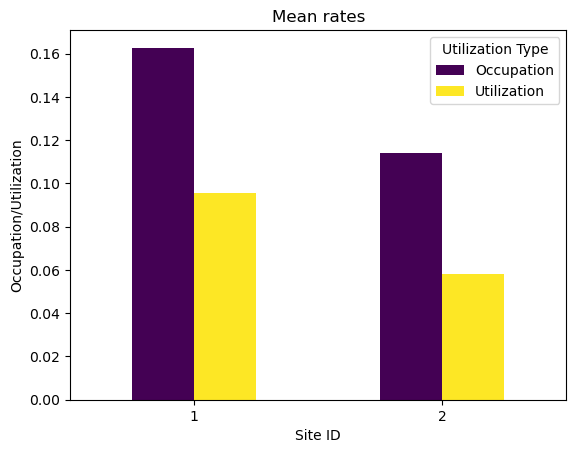

In [ ]:
import matplotlib.pyplot as plt
means_df = pd.DataFrame({
    'Occupation': mean_connection_utilization_by_site,
    'Utilization': mean_charging_utilization_by_site,
})
means_df.plot(kind='bar', rot=0, colormap='viridis')
plt.xlabel('Site ID')
plt.ylabel('Occupation/Utilization')
plt.title('Mean rates')
plt.legend(title='Utilization Type')
plt.show()


#### This graph shows the difference of occupation and utilization. Therefore, nearly 60% of the time a car is on a station at site 1 it gets charged.

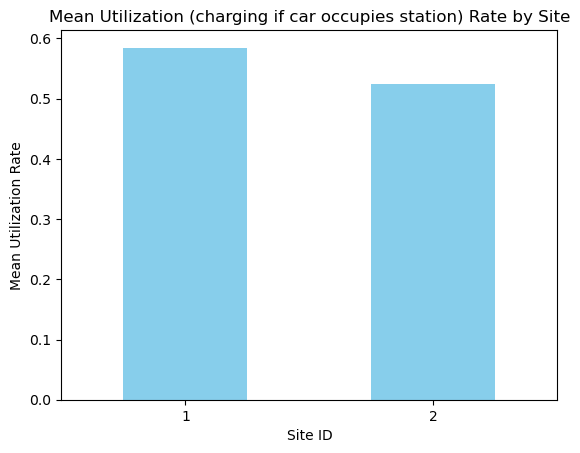

In [ ]:
mean_charging_if_conncted_utilization_by_site.plot(kind='bar', rot=0, color='skyblue')
plt.xlabel('Site ID')
plt.ylabel('Mean Utilization Rate')
plt.title('Mean Utilization (charging if car occupies station) Rate by Site')
plt.show()

## Calculating the KPIs
#### Now we calculate the occupation and utilization rate of each site. The dataframe hourly_occupation_df is a list of timestamps for each hour starting at the first charginsession recorded and ending when the last chargingsession is recorded. This will give us the number of occupied and utilized stations for each hourly timestamp over the period of time the sites are operated.

#### KPI 1: Occupation
The occupation describes the time where a car is occupiying station, whether it is currently charging or not.
#### KPI 2: Utilization
The utilization describes the time where a car is connected to a station and charging. 

### Preperation of KPI 1 and 2 by constructing the KPI_hourly_df

In [ ]:
## generate a df for calculating the occupation time

start_timestamp = pd.to_datetime("2018-04-25 00:00:00+00:00")
end_timestamp = pd.to_datetime("2021-09-14 16:00:00+00:00")

# Generate a range of hourly timestamps
hourly_timestamps = pd.date_range(start=start_timestamp, end=end_timestamp, freq='H')

# Create the DataFrame
KPI_hourly_df = pd.DataFrame({
    'time_id': range(1, len(hourly_timestamps) + 1),
    'hourly_timestamp': hourly_timestamps
})

# Display the DataFrame
print(KPI_hourly_df)

       time_id          hourly_timestamp
0            1 2018-04-25 00:00:00+00:00
1            2 2018-04-25 01:00:00+00:00
2            3 2018-04-25 02:00:00+00:00
3            4 2018-04-25 03:00:00+00:00
4            5 2018-04-25 04:00:00+00:00
...        ...                       ...
29724    29725 2021-09-14 12:00:00+00:00
29725    29726 2021-09-14 13:00:00+00:00
29726    29727 2021-09-14 14:00:00+00:00
29727    29728 2021-09-14 15:00:00+00:00
29728    29729 2021-09-14 16:00:00+00:00

[29729 rows x 2 columns]


In [ ]:
# Convert connectionTime and disconnectTime to datetime objects with the same timezone
Charging_set['connectionTime'] = Charging_set['connectionTime'].apply(lambda x: pd.to_datetime(x))
Charging_set['disconnectTime'] = Charging_set['disconnectTime'].apply(lambda x: pd.to_datetime(x))
Charging_set['doneChargingTime'] = Charging_set['doneChargingTime'].apply(lambda x: pd.to_datetime(x))

# Initialize a list to store the number of sessions for each timestamp
sessions_count_site1_occupation = []
sessions_count_site2_occupation = []

# Iterate through each timestamp in hourly_timestamp
for timestamp in KPI_hourly_df['hourly_timestamp']:
    # Filter sessions where the timestamp is within the connectionTime and disconnectTime range
    sessions_site1_occupation = Charging_set[
        (Charging_set['connectionTime'] < timestamp) &
        (Charging_set['disconnectTime'] > timestamp) &
        (Charging_set['siteID'] == 1)
    ]
    sessions_site2_occupation = Charging_set[
        (Charging_set['connectionTime'] < timestamp) &
        (Charging_set['disconnectTime'] > timestamp) &
        (Charging_set['siteID'] == 2)
    ]
    # Count the number of sessions for each site
    sessions_count_site1_occupation.append(len(sessions_site1_occupation))
    sessions_count_site2_occupation.append(len(sessions_site2_occupation))

# Add the sessions count to the DataFrame
KPI_hourly_df['sessions_count_site1_occupation'] = sessions_count_site1_occupation
KPI_hourly_df['sessions_count_site2_occupation'] = sessions_count_site2_occupation



# Display the updated DataFrame
print(KPI_hourly_df)

       time_id          hourly_timestamp  sessions_count_site1_occupation  \
0            1 2018-04-25 00:00:00+00:00                                0   
1            2 2018-04-25 01:00:00+00:00                                0   
2            3 2018-04-25 02:00:00+00:00                                0   
3            4 2018-04-25 03:00:00+00:00                                0   
4            5 2018-04-25 04:00:00+00:00                                0   
...        ...                       ...                              ...   
29724    29725 2021-09-14 12:00:00+00:00                                1   
29725    29726 2021-09-14 13:00:00+00:00                                1   
29726    29727 2021-09-14 14:00:00+00:00                                1   
29727    29728 2021-09-14 15:00:00+00:00                                0   
29728    29729 2021-09-14 16:00:00+00:00                                0   

       sessions_count_site2_occupation  
0                                 

In [ ]:
# Initialize a list to store the number of sessions for each timestamp
sessions_count_site1_utilization = []
sessions_count_site2_utilization = []

# Iterate through each timestamp in hourly_timestamp
for timestamp in KPI_hourly_df['hourly_timestamp']:
    # Filter sessions where the timestamp is within the connectionTime and disconnectTime range
    sessions_site1_utilization = Charging_set[
        (Charging_set['connectionTime'] < timestamp) &
        (Charging_set['doneChargingTime'] > timestamp) &
        (Charging_set['siteID'] == 1)
    ]
    sessions_site2_utilization = Charging_set[
        (Charging_set['connectionTime'] < timestamp) &
        (Charging_set['doneChargingTime'] > timestamp) &
        (Charging_set['siteID'] == 2)
    ]
    # Count the number of sessions for each site
    sessions_count_site1_utilization.append(len(sessions_site1_utilization))
    sessions_count_site2_utilization.append(len(sessions_site2_utilization))

# Add the sessions count to the df DataFrame
KPI_hourly_df['sessions_count_site1_utilization'] = sessions_count_site1_utilization
KPI_hourly_df['sessions_count_site2_utilization'] = sessions_count_site2_utilization

# Display the updated DataFrame
print(KPI_hourly_df)

       time_id          hourly_timestamp  sessions_count_site1_occupation  \
0            1 2018-04-25 00:00:00+00:00                                0   
1            2 2018-04-25 01:00:00+00:00                                0   
2            3 2018-04-25 02:00:00+00:00                                0   
3            4 2018-04-25 03:00:00+00:00                                0   
4            5 2018-04-25 04:00:00+00:00                                0   
...        ...                       ...                              ...   
29724    29725 2021-09-14 12:00:00+00:00                                1   
29725    29726 2021-09-14 13:00:00+00:00                                1   
29726    29727 2021-09-14 14:00:00+00:00                                1   
29727    29728 2021-09-14 15:00:00+00:00                                0   
29728    29729 2021-09-14 16:00:00+00:00                                0   

       sessions_count_site2_occupation  sessions_count_site1_utilization  \

### Calculation Occupation Rate and Utilization Rate
#### Now we will devide the number of occupied/utilized stations with the total number of stations of each site. This will give us a rate for the occupation and utilization.

#### Here we will use the occupation and utilization rates calculated in the section before for validation. We strongly assume, that not each station is available over the whole period each site operates. However, in this calculation we devide each houe of the sites operation by all sites. We accept the difference, to reduce the complexity of the calculation and make it more understandable. We can accept this, by adhering to the validation previouly calculated, where only a small difference in utilization and occupation can be observed.

In [ ]:
total_number_stations_sites = Charging_set.groupby(['siteID'])['stationID'].nunique()
print(total_number_stations_sites)


siteID
1    52
2    54
Name: stationID, dtype: int64


In [ ]:
# we add two features in hourly_occupation_df that describe the hourly occupation rate per site
KPI_hourly_df['hourly_occupation_site1'] = KPI_hourly_df['sessions_count_site1_occupation'] / total_number_stations_sites.loc[1]
KPI_hourly_df['hourly_occupation_site2'] = KPI_hourly_df['sessions_count_site2_occupation'] / total_number_stations_sites.loc[2]
KPI_hourly_df['hourly_utilization_site1'] = KPI_hourly_df['sessions_count_site1_utilization'] / total_number_stations_sites.loc[1]
KPI_hourly_df['hourly_utilization_site2'] = KPI_hourly_df['sessions_count_site2_utilization'] / total_number_stations_sites.loc[2]

In [ ]:
# Create new features for occupation calculation
KPI_hourly_df['date'] = KPI_hourly_df['hourly_timestamp'].dt.date
KPI_hourly_df['month'] = KPI_hourly_df['hourly_timestamp'].dt.month
KPI_hourly_df['year'] = KPI_hourly_df['hourly_timestamp'].dt.year

In [ ]:
## Now we can make the actual occupation and performance calculations - This can be used to verify the rates with the occupation and
## utilization rates calculated before

## 2. occupationrate of each site and both sites grouped by whole time, year, month, day, hour

occupation_rate_site1_wholetime = KPI_hourly_df['hourly_occupation_site1'].mean()
occupation_rate_site2_wholetime = KPI_hourly_df['hourly_occupation_site2'].mean()
occupation_rate_wholetime = (occupation_rate_site1_wholetime + occupation_rate_site2_wholetime) /2
print("The occupation rate of site 1 over the whole period of time is:")
print(occupation_rate_site1_wholetime)
print("The occupation rate of site 2 over the whole period of time is:")
print(occupation_rate_site2_wholetime)
print("The occupation rate of both sites over the whole period of time is:")
print(occupation_rate_wholetime)

The occupation rate of site 1 over the whole period of time is:
0.14057692954561332
The occupation rate of site 2 over the whole period of time is:
0.1069519349481676
The occupation rate of both sites over the whole period of time is:
0.12376443224689046


### The main finding for KPI 1 - The Occupationrate for each site over the whole time the sites are operating

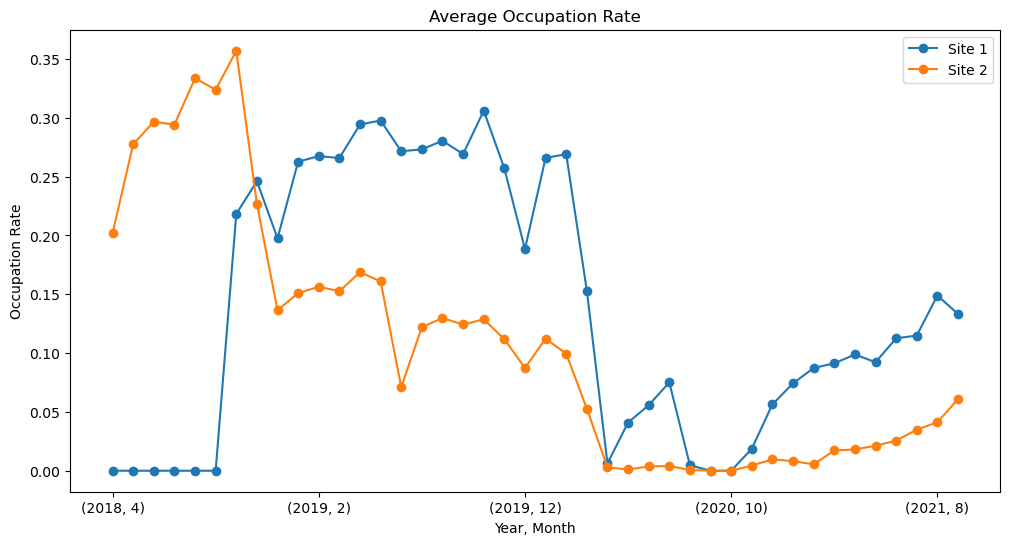

In [ ]:

monthly_avg_occupation_site1 = KPI_hourly_df.groupby([KPI_hourly_df['year'], KPI_hourly_df['month']])['hourly_occupation_site1'].mean()
monthly_avg_occupation_site2 = KPI_hourly_df.groupby([KPI_hourly_df['year'], KPI_hourly_df['month']])['hourly_occupation_site2'].mean()

plt.figure(figsize=(12, 6))

monthly_avg_occupation_site1.plot(marker='o', label = 'Site 1')
monthly_avg_occupation_site2.plot(marker= 'o', label = 'Site 2')

plt.xlabel('Year, Month')
plt.ylabel('Occupation Rate')
plt.title('Average Occupation Rate')

plt.legend()

plt.show()


#### This graph can show the daily and hourly occupation of for each site for any given day.

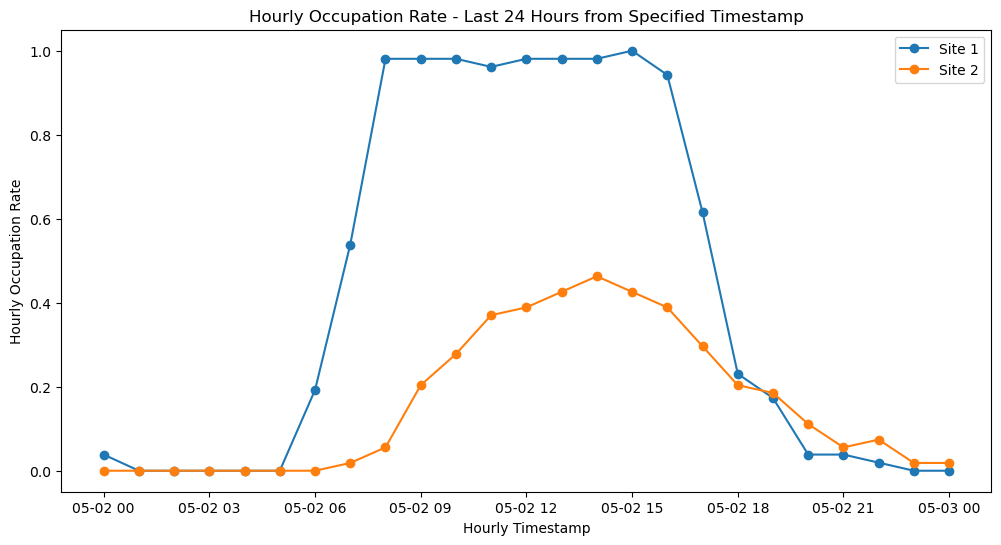

In [ ]:
from datetime import datetime, timedelta, timezone
import pytz
# format timestamp
KPI_hourly_df['hourly_timestamp'] = KPI_hourly_df['hourly_timestamp'].dt.tz_convert(pytz.timezone('America/Los_Angeles'))
# select time
specified_timestamp = pd.to_datetime('2019-05-03 00:00:00').tz_localize('America/Los_Angeles')

# Filter the DataFrame for the last 24 hours from the specified timestamp
last_24_hours_df = KPI_hourly_df[
    (KPI_hourly_df['hourly_timestamp'] >= specified_timestamp - timedelta(hours=24)) &
    (KPI_hourly_df['hourly_timestamp'] <= specified_timestamp)
]
plt.figure(figsize=(12, 6))

# Plot the hourly utilization rate for site1
plt.plot(last_24_hours_df['hourly_timestamp'], last_24_hours_df['hourly_occupation_site1'], marker='o', label='Site 1')
plt.plot(last_24_hours_df['hourly_timestamp'], last_24_hours_df['hourly_occupation_site2'], marker='o', label='Site 2')


# Set labels and title
plt.xlabel('Hourly Timestamp')
plt.ylabel('Hourly Occupation Rate')
plt.title('Hourly Occupation Rate - Last 24 Hours from Specified Timestamp')

# Add a legend
plt.legend()

# Show the plot
plt.show()


#### This graph shows the weekly occupation rate from any given moment

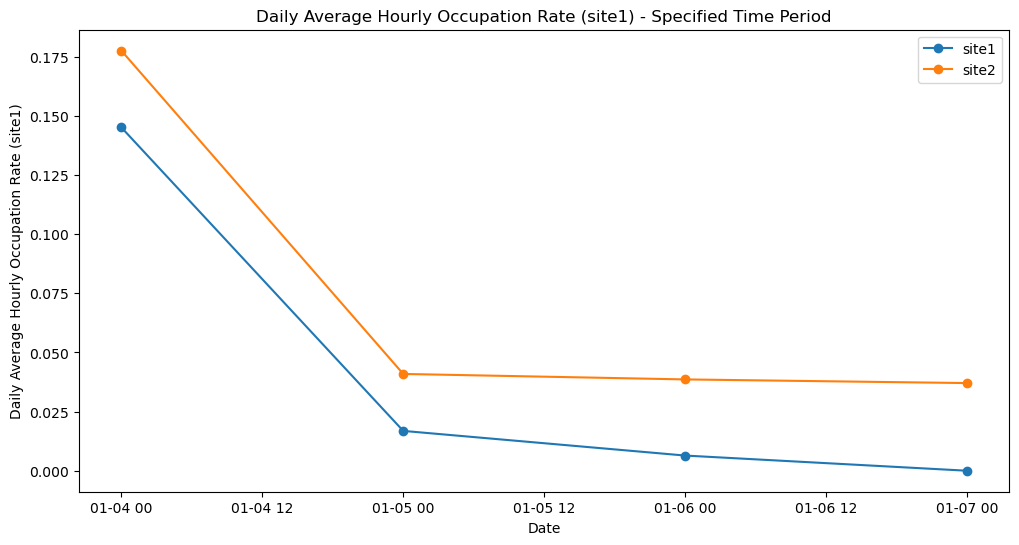

In [ ]:

# Specify the time period
start_date = pd.to_datetime('2019-01-04 00:00:00').tz_localize('America/Los_Angeles')
end_date = pd.to_datetime('2019-01-07 00:00:00').tz_localize('America/Los_Angeles')

# Filter the DataFrame for the specified time period
specified_period_df = KPI_hourly_df[
    (KPI_hourly_df['hourly_timestamp'] >= start_date) &
    (KPI_hourly_df['hourly_timestamp'] <= end_date)
]
plt.figure(figsize=(12, 6))

# Calculate the daily average occupation rate for site1
daily_avg_occupation_site1 = specified_period_df.groupby(specified_period_df['hourly_timestamp'].dt.date)['hourly_occupation_site1'].mean()
daily_avg_occupation_site2 = specified_period_df.groupby(specified_period_df['hourly_timestamp'].dt.date)['hourly_occupation_site2'].mean()

# Plot the data
daily_avg_occupation_site1.plot(marker='o', label = 'site1')
daily_avg_occupation_site2.plot(marker='o', label = 'site2')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Daily Average Hourly Occupation Rate (site1)')
plt.title('Daily Average Hourly Occupation Rate (site1) - Specified Time Period')

plt.legend()
# Show the plot
plt.show()

### The main finding of KPI 2: Utilization Rate over the period of each sites operation

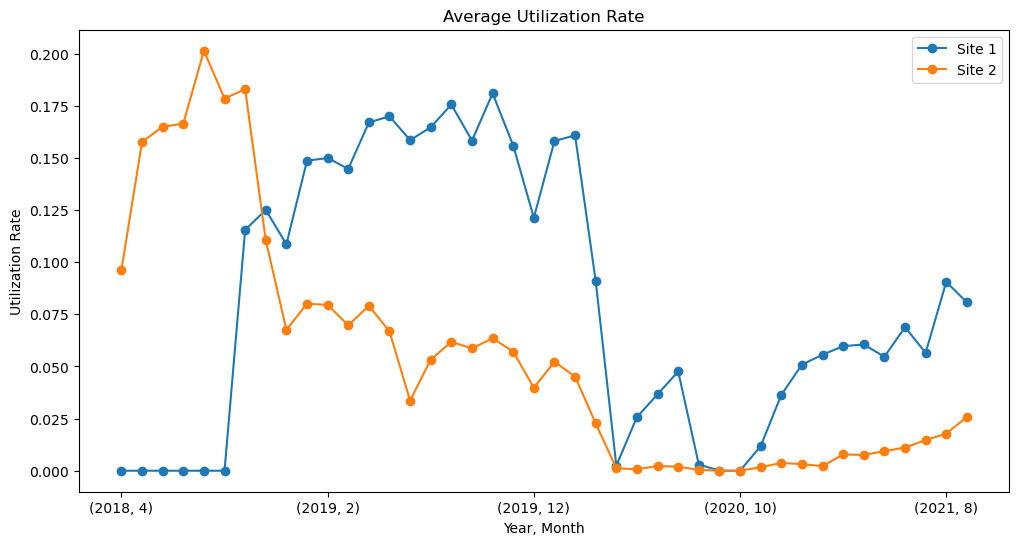

In [ ]:
monthly_avg_utilization_site1 = KPI_hourly_df.groupby([KPI_hourly_df['year'], KPI_hourly_df['month']])['hourly_utilization_site1'].mean()
monthly_avg_utilization_site2 = KPI_hourly_df.groupby([KPI_hourly_df['year'], KPI_hourly_df['month']])['hourly_utilization_site2'].mean()


plt.figure(figsize=(12, 6))

# Plot the data
monthly_avg_utilization_site1.plot(marker='o', label = 'Site 1')
monthly_avg_utilization_site2.plot(marker= 'o', label = 'Site 2')

# Set labels and title
plt.xlabel('Year, Month')
plt.ylabel('Utilization Rate')
plt.title('Average Utilization Rate')

plt.legend()

# Show the plot
plt.show()


#### Shows the utilization rate per site on the last 24 hours of any specified time

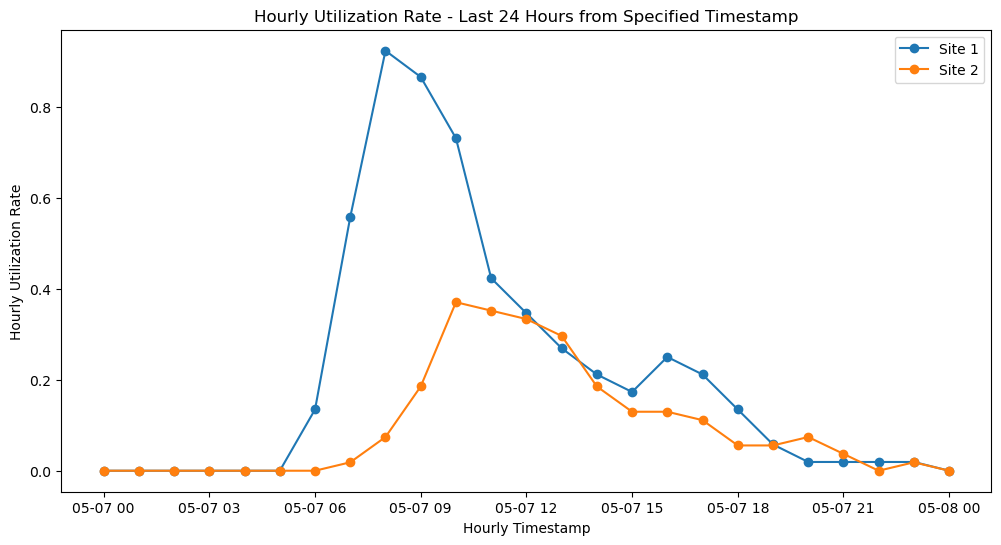

In [ ]:
specified_timestamp = pd.to_datetime('2019-05-08 00:00:00').tz_localize('America/Los_Angeles')

# Filter the DataFrame for the last 24 hours from the specified timestamp
last_24_hours_df = KPI_hourly_df[
    (KPI_hourly_df['hourly_timestamp'] >= specified_timestamp - timedelta(hours=24)) &
    (KPI_hourly_df['hourly_timestamp'] <= specified_timestamp)
]
plt.figure(figsize=(12, 6))

# Plot the hourly utilization rate for site1
plt.plot(last_24_hours_df['hourly_timestamp'], last_24_hours_df['hourly_utilization_site1'], marker='o', label='Site 1')
plt.plot(last_24_hours_df['hourly_timestamp'], last_24_hours_df['hourly_utilization_site2'], marker='o', label='Site 2')

# Set labels and title
plt.xlabel('Hourly Timestamp')
plt.ylabel('Hourly Utilization Rate')
plt.title('Hourly Utilization Rate - Last 24 Hours from Specified Timestamp')


# Add a legend
plt.legend()

#### Shows the utilization rate of each site of a specified timeframe

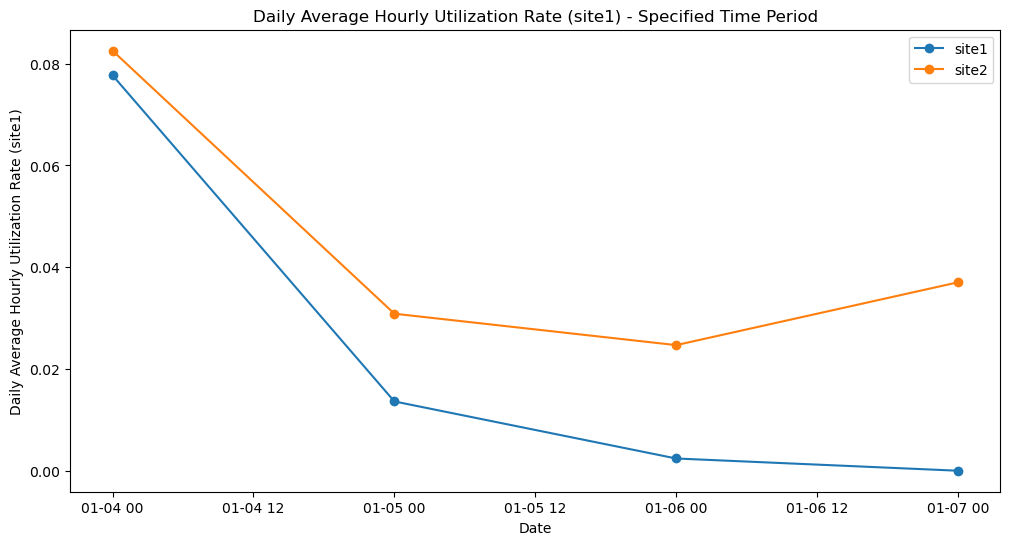

In [ ]:
# specify the time period
start_date = pd.to_datetime('2019-01-04 00:00:00').tz_localize('America/Los_Angeles')
end_date = pd.to_datetime('2019-01-07 00:00:00').tz_localize('America/Los_Angeles')

# Filter the DataFrame for the specified time period
specified_period_df = KPI_hourly_df[
    (KPI_hourly_df['hourly_timestamp'] >= start_date) &
    (KPI_hourly_df['hourly_timestamp'] <= end_date)
]
plt.figure(figsize=(12, 6))

# Calculate the daily average occupation rate for site1
daily_avg_utilization_site1 = specified_period_df.groupby(specified_period_df['hourly_timestamp'].dt.date)['hourly_utilization_site1'].mean()
daily_avg_utilization_site2 = specified_period_df.groupby(specified_period_df['hourly_timestamp'].dt.date)['hourly_utilization_site2'].mean()

# Plot the data
daily_avg_utilization_site1.plot(marker='o', label = 'site1')
daily_avg_utilization_site2.plot(marker='o', label = 'site2')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Daily Average Hourly Utilization Rate (site1)')
plt.title('Daily Average Hourly Utilization Rate (site1) - Specified Time Period')


plt.legend()
# Show the plot
plt.show()

## Comparing KPI 1 and KPI 2

#### The utilization rate and occupation rate are compared to estimate the time a car is connected to a station but not charging (Lead Time). 

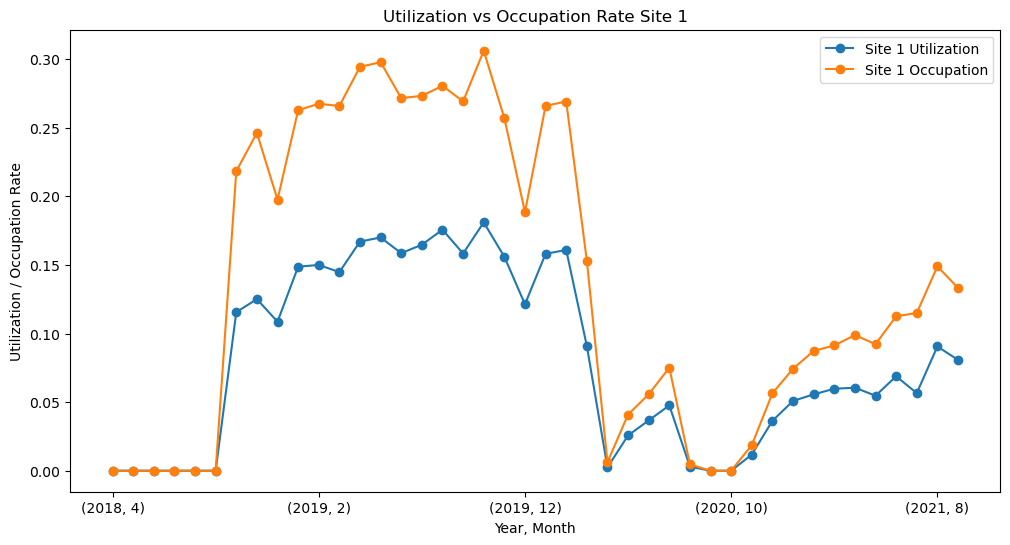

In [ ]:
plt.figure(figsize=(12, 6))

monthly_avg_utilization_site1.plot(marker='o', label = 'Site 1 Utilization')
monthly_avg_occupation_site1.plot(marker='o', label = 'Site 1 Occupation')


# Set labels and title
plt.xlabel('Year, Month')
plt.ylabel('Utilization / Occupation Rate')
plt.title('Utilization vs Occupation Rate Site 1')



plt.legend()

# Show the plot
plt.show()


Compares the utilization and occupation of site 2

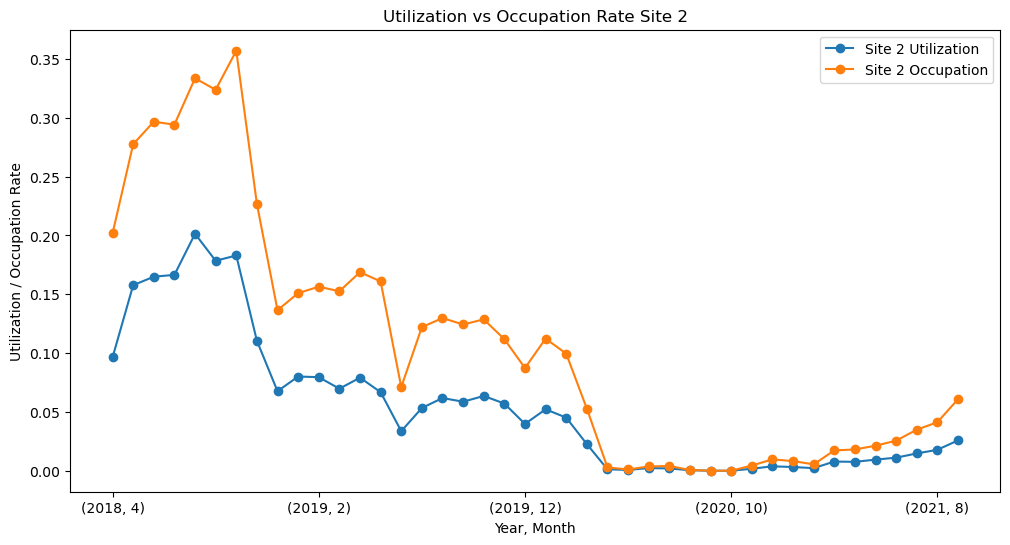

In [ ]:
plt.figure(figsize=(12, 6))

monthly_avg_utilization_site2.plot(marker= 'o', label = 'Site 2 Utilization')
monthly_avg_occupation_site2.plot(marker= 'o', label = 'Site 2 Occupation')

# Set labels and title
plt.xlabel('Year, Month')
plt.ylabel('Utilization / Occupation Rate')
plt.title('Utilization vs Occupation Rate Site 2')



plt.legend()

# Show the plot
plt.show()

Compares the utilization and occupation of both sites

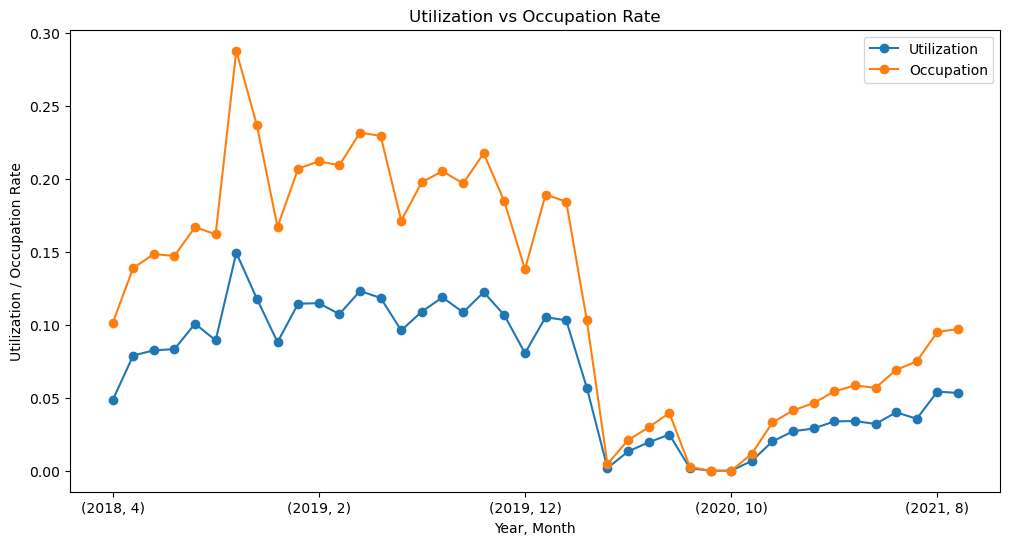

In [ ]:
plt.figure(figsize=(12, 6))

monthly_avg_utilization = (monthly_avg_utilization_site2 + monthly_avg_utilization_site1) /2
monthly_avg_occupation = (monthly_avg_occupation_site2 + monthly_avg_occupation_site1) /2

monthly_avg_utilization.plot(marker= 'o', label = 'Utilization')
monthly_avg_occupation.plot(marker= 'o', label = 'Occupation')

# Set labels and title
plt.xlabel('Year, Month')
plt.ylabel('Utilization / Occupation Rate')
plt.title('Utilization vs Occupation Rate')


plt.legend()

# Show the plot
plt.show()

## KPI 3: KhW delivered 

In [ ]:
selected_columns = ['id', 'connectionTime', 'disconnectTime', 'doneChargingTime', 'kWhDelivered', 'siteID', 'stationID']
KPI_KhW_delivered = Charging_set[selected_columns].copy()
KPI_KhW_delivered.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,stationID
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,1-1-179-810
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,1-1-193-825
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,1-1-193-829
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1-1-193-820
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,1-1-193-819


In [ ]:

KPI_KhW_delivered['connectionTime'] = pd.to_datetime(KPI_KhW_delivered['connectionTime'])
KPI_KhW_delivered['doneChargingTime'] = pd.to_datetime(KPI_KhW_delivered['doneChargingTime'])

# Calculate the time difference
KPI_KhW_delivered['chargingTime'] = KPI_KhW_delivered['doneChargingTime'] - KPI_KhW_delivered['connectionTime']
KPI_KhW_delivered['chargingTime_seconds'] = KPI_KhW_delivered['chargingTime'].dt.total_seconds()


KPI_KhW_delivered['khWDelivered per hour'] = KPI_KhW_delivered['kWhDelivered'] / KPI_KhW_delivered['chargingTime_seconds'] * 3600


In [ ]:
selected_columns1  = ['time_id', 'hourly_timestamp', 'date', 'month', 'year']
selected_columns2 = ['connectionTime', 'kWhDelivered', 'siteID', 'chargingTime', 'khWDelivered per hour']
KPI_khW_timestamp = KPI_hourly_df[selected_columns1].copy()
KPI_KhW_delivered = KPI_KhW_delivered[selected_columns2].copy()

In [ ]:

KPI_KhW_delivered['connectionTime'] = pd.to_datetime(KPI_KhW_delivered['connectionTime'])

# Convert the 'chargingTime' column to timedelta format
KPI_KhW_delivered['chargingTime'] = pd.to_timedelta(KPI_KhW_delivered['chargingTime'])

# Add the charging time to the connection time to get the end time
KPI_KhW_delivered['endTime'] = KPI_KhW_delivered['connectionTime'] + KPI_KhW_delivered['chargingTime']
KPI_KhW_delivered.head()

,connectionTime,kWhDelivered,siteID,chargingTime,khWDelivered per hour,endTime
0,2020-01-02 13:08:54+00:00,25.016,1,0 days 04:22:41,5.713952,2020-01-02 17:31:35+00:00
1,2020-01-02 13:36:50+00:00,33.097,1,0 days 06:41:15,4.949084,2020-01-02 20:18:05+00:00
2,2020-01-02 13:56:35+00:00,6.521,1,0 days 02:38:31,2.468258,2020-01-02 16:35:06+00:00
3,2020-01-02 13:59:58+00:00,2.355,1,0 days 01:18:47,1.793527,2020-01-02 15:18:45+00:00
4,2020-01-02 14:00:01+00:00,13.375,1,0 days 04:17:29,3.116707,2020-01-02 18:17:30+00:00


In [ ]:
# Convert columns to datetime if they are not already
KPI_KhW_delivered['connectionTime'] = pd.to_datetime(KPI_KhW_delivered['connectionTime'])
KPI_KhW_delivered['endTime'] = pd.to_datetime(KPI_KhW_delivered['endTime'])
KPI_khW_timestamp['hourly_timestamp'] = pd.to_datetime(KPI_khW_timestamp['hourly_timestamp'])

# Initialize a new column for khWdelivered in KPI_khW_timestamp
KPI_khW_timestamp['khWdelivered'] = 0.0

KPI_khW_timestamp_both_sites = KPI_khW_timestamp.copy()
# Iterate through each row in KPI_KhW_delivered
for index, row in KPI_KhW_delivered.iterrows():
    start_time = row['connectionTime']
    end_time = row['endTime']
    khW_delivered = row['kWhDelivered']

    # Filter rows in KPI_khW_timestamp within the charging period
    mask = (KPI_khW_timestamp_both_sites['hourly_timestamp'] >= start_time) & (KPI_khW_timestamp_both_sites['hourly_timestamp'] <= end_time)

    # Calculate the proportion of charging time for each row
    hourly_timestamps = KPI_khW_timestamp_both_sites.loc[mask, 'hourly_timestamp']
    elapsed_time = (hourly_timestamps - hourly_timestamps.shift(1, fill_value=start_time)).dt.total_seconds()

    # For the last row in the mask, subtract endTime and last hourly_timestamp
    if not elapsed_time.empty:
        elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()
    # Calculate the proportion based on elapsed time
    proportion = elapsed_time / row['chargingTime'].total_seconds()

    # Check if the sum of proportions is not equal to 1
    if abs(proportion.sum() - 1.0) > 1e-10:
        print(f"Warning: Sum of proportions is not equal to 1 for row {index}. Sum: {proportion.sum()}")
        print("Details:")
        print(f"   Elapsed Time: {elapsed_time}")
        print(f"   Charging Time: {row['chargingTime'].total_seconds()}")
        print(f"   Proportion: {proportion}")

    # Distribute khWdelivered based on the proportion
    KPI_khW_timestamp_both_sites.loc[mask, 'khWdelivered'] += proportion * khW_delivered

# Print the modified KPI_khW_timestamp DataFrame
print(KPI_khW_timestamp_both_sites)

C:\Users\joost\AppData\Local\Temp\ipykernel_21608\388026667.py:25: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()


Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 557.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 2719.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 1675.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 1743.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 1699.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 1478.0
   Proportion: Series([], Name: hourly_timestamp, dtype: fl

In [ ]:
# check if sum is equal --> close to equal is good enough.

sum_khWDelivered = KPI_khW_timestamp_both_sites['khWdelivered'].sum()
sum_khWDeliveredOriginal = Charging_set['kWhDelivered'].sum()
print("Sum of khWDelivered:", sum_khWDelivered)
print("Sum of khWDeliveredOriginal:", sum_khWDeliveredOriginal)


Sum of khWDelivered: 700892.8929955193
Sum of khWDeliveredOriginal: 705923.3076910481


The small difference (less than 1%) is explainable due to charging sessions that are very short and therefore get overlooked by the if statement in the code. Are in between two hours i.E. 13:20 - 13:44. This is accepted

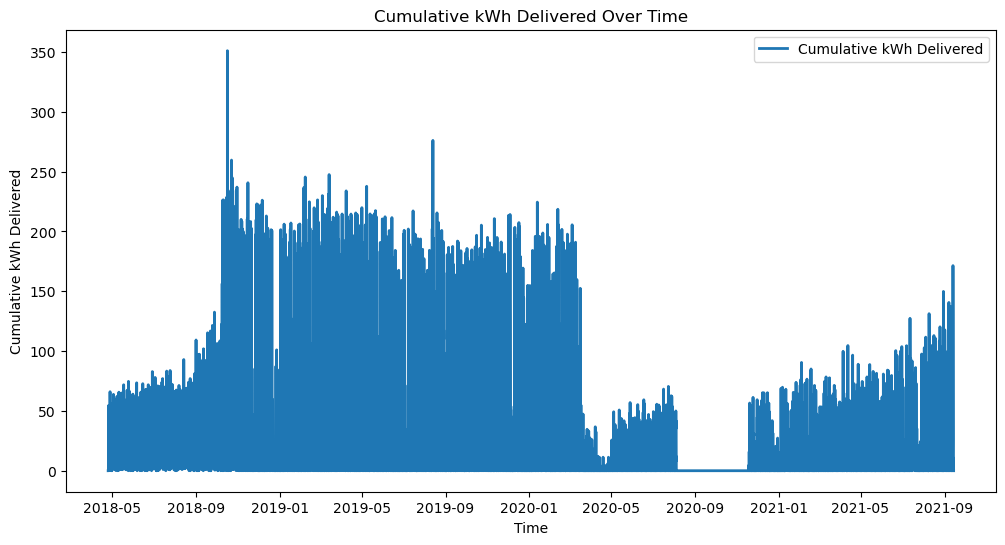

In [ ]:
KPI_khW_timestamp_both_sites['hourly_timestamp'] = pd.to_datetime(KPI_khW_timestamp_both_sites['hourly_timestamp'])

# Group by hourly_timestamp and sum the khWdelivered values
grouped_data = KPI_khW_timestamp_both_sites.groupby('hourly_timestamp')['khWdelivered'].sum().reset_index()

# Plot the data as a line
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['hourly_timestamp'], grouped_data['khWdelivered'], label='Cumulative kWh Delivered', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Cumulative kWh Delivered')
plt.title('Cumulative kWh Delivered Over Time')
plt.legend()
plt.show()

C:\Users\joost\AppData\Local\Temp\ipykernel_21608\186823309.py:20: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()


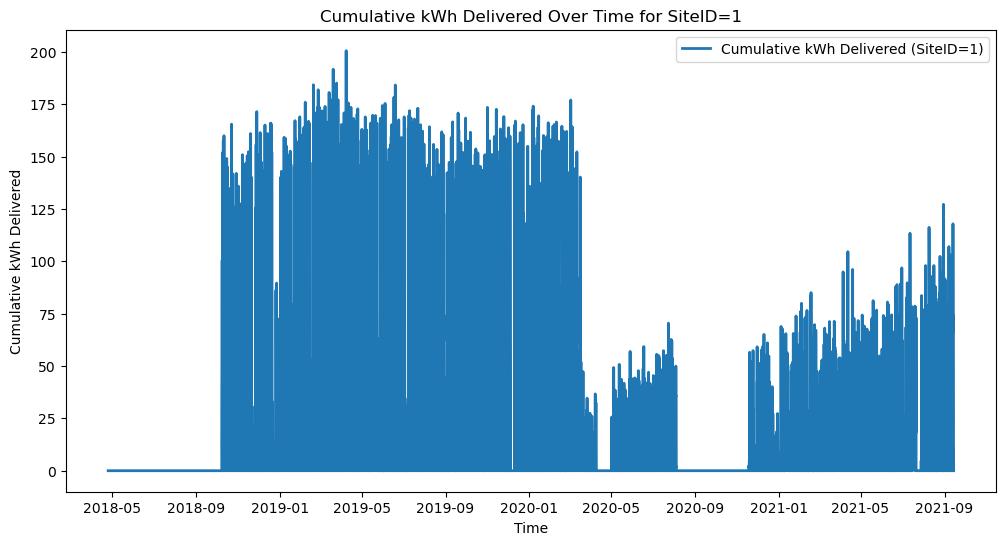

In [ ]:
KPI_khW_timestamp_site1 = KPI_khW_timestamp.copy()
KPI_KhW_delivered_site1 = KPI_KhW_delivered.copy()

for index, row in KPI_KhW_delivered_site1.iterrows():
    # Check if siteID is equal to 1
    if row['siteID'] == 1:
        start_time = row['connectionTime']
        end_time = row['endTime']
        khW_delivered = row['kWhDelivered']

        # Filter rows in KPI_khW_timestamp within the charging period
        mask = (KPI_khW_timestamp_site1['hourly_timestamp'] >= start_time) & (KPI_khW_timestamp_site1['hourly_timestamp'] <= end_time)

        # Calculate the proportion of charging time for each row
        hourly_timestamps = KPI_khW_timestamp_site1.loc[mask, 'hourly_timestamp']
        elapsed_time = (hourly_timestamps - hourly_timestamps.shift(1, fill_value=start_time)).dt.total_seconds()

        # For the last row in the mask, add the missing proportion due to the last row's hourly timestamp
        if not elapsed_time.empty:
            elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()

        # Calculate the proportion based on elapsed time
        proportion = elapsed_time / row['chargingTime'].total_seconds()

        # Distribute khWdelivered based on the proportion
        KPI_khW_timestamp_site1.loc[mask, 'khWdelivered'] += proportion * khW_delivered

# Plot the cumulative kWh delivered over time for siteID=1
plt.figure(figsize=(12, 6))
plt.plot(KPI_khW_timestamp_site1['hourly_timestamp'], KPI_khW_timestamp_site1['khWdelivered'], label='Cumulative kWh Delivered (SiteID=1)', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Cumulative kWh Delivered')
plt.title('Cumulative kWh Delivered Over Time for SiteID=1')
plt.legend()
plt.show()

C:\Users\joost\AppData\Local\Temp\ipykernel_21608\1230485828.py:20: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()


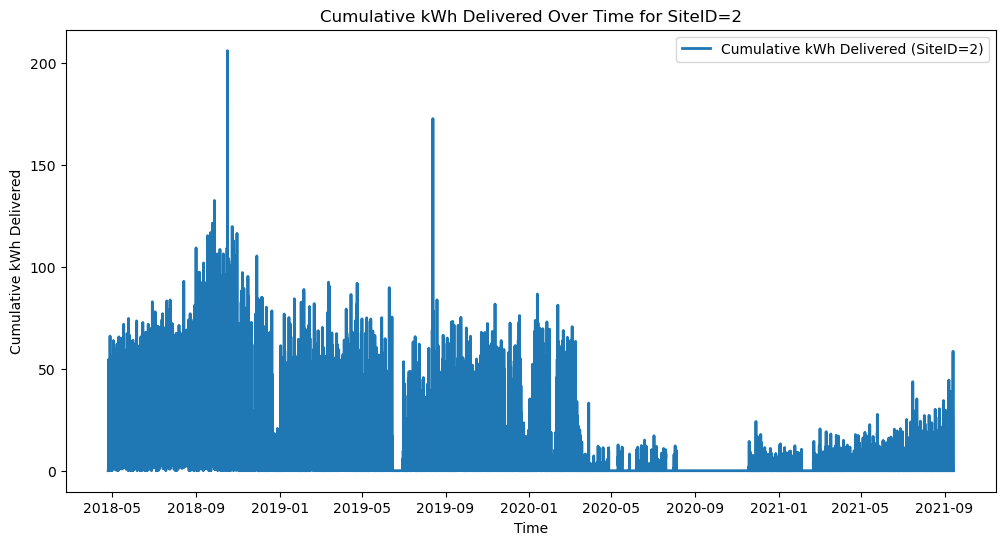

In [ ]:
KPI_khW_timestamp_site2 = KPI_khW_timestamp.copy()
KPI_KhW_delivered_site2 = KPI_KhW_delivered.copy()

for index, row in KPI_KhW_delivered_site2.iterrows():
    # Check if siteID is equal to 1
    if row['siteID'] == 2:
        start_time = row['connectionTime']
        end_time = row['endTime']
        khW_delivered = row['kWhDelivered']

        # Filter rows in KPI_khW_timestamp within the charging period
        mask = (KPI_khW_timestamp_site2['hourly_timestamp'] >= start_time) & (KPI_khW_timestamp_site2['hourly_timestamp'] <= end_time)

        # Calculate the proportion of charging time for each row
        hourly_timestamps = KPI_khW_timestamp_site2.loc[mask, 'hourly_timestamp']
        elapsed_time = (hourly_timestamps - hourly_timestamps.shift(1, fill_value=start_time)).dt.total_seconds()

        # For the last row in the mask, add the missing proportion due to the last row's hourly timestamp
        if not elapsed_time.empty:
            elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()

        # Calculate the proportion based on elapsed time
        proportion = elapsed_time / row['chargingTime'].total_seconds()

        # Distribute khWdelivered based on the proportion
        KPI_khW_timestamp_site2.loc[mask, 'khWdelivered'] += proportion * khW_delivered

# Plot the cumulative kWh delivered over time for siteID=1
plt.figure(figsize=(12, 6))
plt.plot(KPI_khW_timestamp_site2['hourly_timestamp'], KPI_khW_timestamp_site2['khWdelivered'], label='Cumulative kWh Delivered (SiteID=2)', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Cumulative kWh Delivered')
plt.title('Cumulative kWh Delivered Over Time for SiteID=2')
plt.legend()
plt.show()

## Trends:
Utilization = bei aufnahme von Site 1 wird Site 2 weniger: Leute wechseln?
Corona = Sehr stark zu sehen, Site 1 Kommt besser wieder zum laufen
Jahreswechsel = (Urlaub/betriebsferien) 
